In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
data = pd.read_csv('ML_data.csv')

In [69]:
data.head()

,time_check,nodes,channels_available,primary_users
0,0,0,5.0,5
1,0,1,6.0,5
2,0,10,7.0,5
3,0,11,7.0,5
4,0,12,5.0,5


In [70]:
data = data.sample(frac=1).reset_index(drop=True)

In [71]:
data = data[['time_check', 'nodes', 'primary_users','channels_available']]
data.head()

,time_check,nodes,primary_users,channels_available
0,250,20,5,8.0
1,130,1,10,3.0
2,580,18,15,3.0
3,90,18,30,2.0
4,145,21,10,3.0


In [72]:
training_set = int(0.8*len(data))
training_set

17856

In [73]:
#Training data
features = data[['time_check', 'nodes', 'primary_users']]
labels = data['channels_available']
#training_set = np.ceil(0.8*len(data))
training_set = int(0.8*len(data))
X_train = features[:training_set]
y_train = labels[:training_set]
# Testing Data
X_test = features[training_set:]
y_test = labels[training_set:]

In [74]:
data.head()

,time_check,nodes,primary_users,channels_available
0,250,20,5,8.0
1,130,1,10,3.0
2,580,18,15,3.0
3,90,18,30,2.0
4,145,21,10,3.0


### The metrics to evaluate the machine learning algos
The problem of identifying the available channels for opportunistic access is a classification problem and 
we identify that the best classification algorithms are as follows Random Forest, K- Nearest Neighbours
Gaussian Naive Bayes and SVM
SO we apply these machine learning algorithms on our data and evaluate them using 4 techniques to know how well it is performing.
1. Confusion matrix which shows the distribution of how many classes were correctly predicted and not
2. Precision: When a positive value is predicted, how often is the prediction correct? How "precise" is the classifier when predicting positive instances? (Precision = TP/(TP+FP))
3. Recall: When the actual value is positive, how often is the prediction correct? Something we want to maximize How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Sensitivity" (Recall = TP / all positive) where all positive = TP + FN
4. F1 score combines precision and recall relative to a specific positive class -The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0 (F1 = 2 * (precision * recall) / (precision + recall))
We didnt use Accuracy because Usually when the class distribution is unbalanced, accuracy is considered a poor 
choice as it gives high scores to models which just predict the most frequent class.

From this work we find that Random Forest works best

### Random Forest

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1371   52   10    0    0    0    0]
 [  84 1665  106    9    1    0    0]
 [  23  170  558   42    1    0    0]
 [   3   25   51  331   82   14    4]
 [   0    2    8   51  537   75   15]
 [   0    0    0   14   80  139    7]
 [   0    0    0    5   20   13   12]]
Normalized confusion matrix
[[  9.57e-01   3.63e-02   6.98e-03   0.00e+00   0.00e+00   0.00e+00
    0.00e+00]
 [  4.50e-02   8.93e-01   5.68e-02   4.83e-03   5.36e-04   0.00e+00
    0.00e+00]
 [  2.90e-02   2.14e-01   7.03e-01   5.29e-02   1.26e-03   0.00e+00
    0.00e+00]
 [  5.88e-03   4.90e-02   1.00e-01   6.49e-01   1.61e-01   2.75e-02
    7.84e-03]
 [  0.00e+00   2.91e-03   1.16e-02   7.41e-02   7.81e-01   1.09e-01
    2.18e-02]
 [  0.00e+00   0.00e+00   0.00e+00   5.83e-02   3.33e-01   5.79e-01
    2.92e-02]
 [  0.00e+00   0.00e+00   0.00e+00   1.00e-01   4.00e-01   2.60e-01
    2.40e-01]]


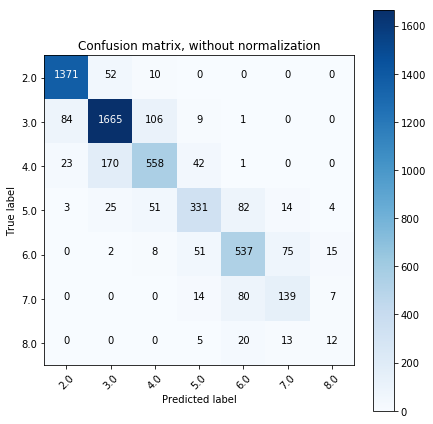

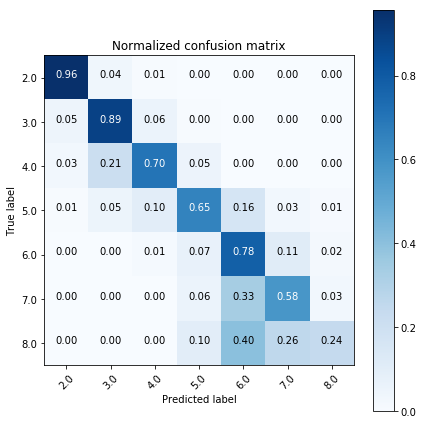

In [119]:
print(__doc__)

import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

class_names = ['2.0','3.0','4.0','5.0','6.0','7.0','8.0']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
classifier = RandomForestClassifier(n_estimators=15)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### KNN

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1373   58    2    0    0    0    0]
 [ 137 1653   62    9    4    0    0]
 [  40  369  370   12    3    0    0]
 [   6   77   83  120  201   19    4]
 [   0   11   13   68  540   53    3]
 [   0    1    0   29  156   54    0]
 [   0    0    0    9   38    0    3]]
Normalized confusion matrix
[[ 0.96  0.04  0.    0.    0.    0.    0.  ]
 [ 0.07  0.89  0.03  0.    0.    0.    0.  ]
 [ 0.05  0.46  0.47  0.02  0.    0.    0.  ]
 [ 0.01  0.15  0.16  0.24  0.39  0.04  0.01]
 [ 0.    0.02  0.02  0.1   0.78  0.08  0.  ]
 [ 0.    0.    0.    0.12  0.65  0.23  0.  ]
 [ 0.    0.    0.    0.18  0.76  0.    0.06]]


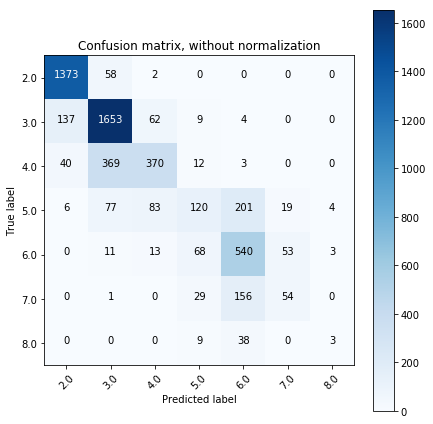

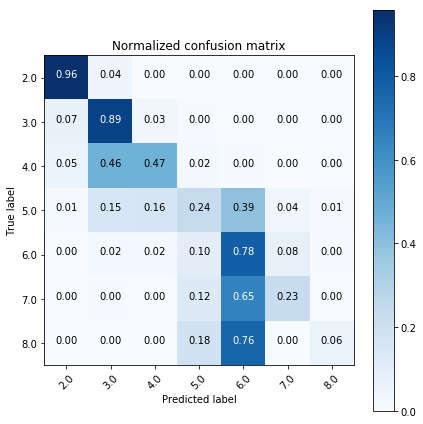

In [76]:
print(__doc__)

import itertools
#from sklearn import gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier

class_names = ['2.0','3.0','4.0','5.0','6.0','7.0','8.0']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#classifier = RandomForestClassifier(n_estimators=10)
#classifier = GaussianNB()
classifier = KNeighborsClassifier(n_neighbors=15)
y_pred = classifier.fit(X_train, y_train).predict(X_test)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Gaussian Naive Bayes

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1068  365    0    0    0    0    0]
 [ 651 1094    0    0  120    0    0]
 [ 104  545    0    0  145    0    0]
 [  11  137    0    0  197    0  165]
 [   1   67    0    0  298    0  322]
 [   0    6    0    0   82    0  152]
 [   0    0    0    0    0    0   50]]
Normalized confusion matrix
[[ 0.75  0.25  0.    0.    0.    0.    0.  ]
 [ 0.35  0.59  0.    0.    0.06  0.    0.  ]
 [ 0.13  0.69  0.    0.    0.18  0.    0.  ]
 [ 0.02  0.27  0.    0.    0.39  0.    0.32]
 [ 0.    0.1   0.    0.    0.43  0.    0.47]
 [ 0.    0.03  0.    0.    0.34  0.    0.63]
 [ 0.    0.    0.    0.    0.    0.    1.  ]]


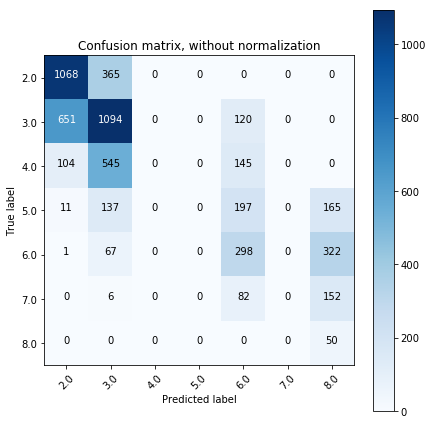

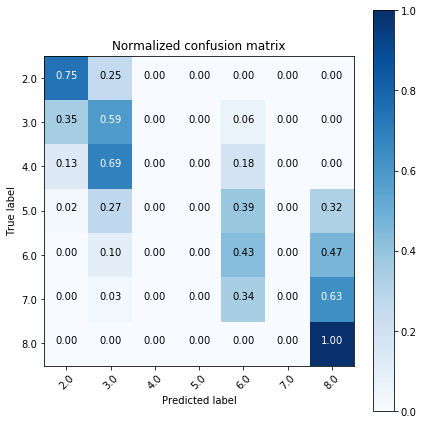

In [120]:
print(__doc__)

import itertools
#from sklearn import gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB


class_names = ['2.0','3.0','4.0','5.0','6.0','7.0','8.0']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#classifier = RandomForestClassifier(n_estimators=10)
classifier = GaussianNB()
y_pred = classifier.fit(X_train, y_train).predict(X_test)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### SVM

Confusion matrix, without normalization
[[ 967  466    0    0    0    0    0]
 [ 489 1364    0   12    0    0    0]
 [  63  634    0    6   91    0    0]
 [   5  156    0    5  344    0    0]
 [   0   69    0    0  619    0    0]
 [   0    6    0    0  234    0    0]
 [   0    0    0    0   50    0    0]]
Normalized confusion matrix
[[ 0.67  0.33  0.    0.    0.    0.    0.  ]
 [ 0.26  0.73  0.    0.01  0.    0.    0.  ]
 [ 0.08  0.8   0.    0.01  0.11  0.    0.  ]
 [ 0.01  0.31  0.    0.01  0.67  0.    0.  ]
 [ 0.    0.1   0.    0.    0.9   0.    0.  ]
 [ 0.    0.03  0.    0.    0.97  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


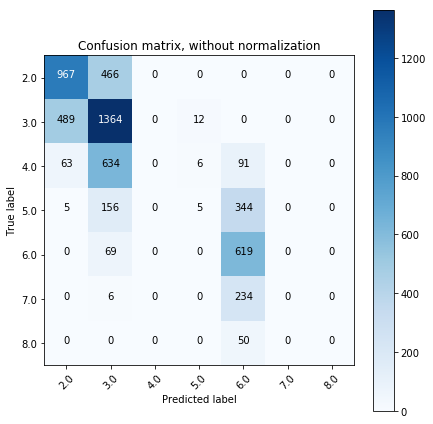

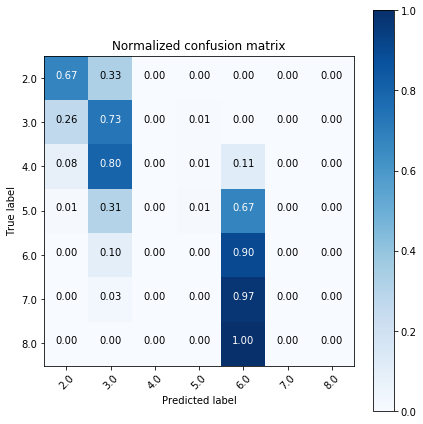

In [118]:
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['2.0','3.0','4.0','5.0','6.0','7.0','8.0']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
#classifier = RandomForestClassifier(n_estimators=10)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## From the confusion matrices abve we can further refine our evaluation using metrics like recall, precision and f1-score to further evaluate our ML models.
In all this Random Forest works better as shown below

In [85]:
# Cross Validation Classification Report
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, labels, test_size=test_size, random_state=seed)
#model = LogisticRegression()
model1 = RandomForestClassifier(n_estimators=10)
model2 = GaussianNB()
model3 = svm.SVC(kernel='linear', C=0.01)
model4 = KNeighborsClassifier(n_neighbors=15)
model1.fit(X_train, Y_train),model2.fit(X_train, Y_train),model3.fit(X_train, Y_train),model4.fit(X_train, Y_train)
predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test)
predicted3 = model3.predict(X_test)
predicted4 = model4.predict(X_test)

report1 = classification_report(Y_test, predicted1)
report2 = classification_report(Y_test, predicted2)
report3 = classification_report(Y_test, predicted3)
report4 = classification_report(Y_test, predicted4)
print('Random Forest Classifier')
print(report1)
print('KNN')
print(report4)
print('Gaussian Naive Bayes')
print(report2)
print('SVM')
print(report3)

Random Forest Classifier
             precision    recall  f1-score   support

        2.0       0.94      0.96      0.95      1176
        3.0       0.87      0.90      0.88      1497
        4.0       0.74      0.67      0.70       600
        5.0       0.72      0.66      0.69       379
        6.0       0.76      0.80      0.78       553
        7.0       0.57      0.54      0.55       215
        8.0       0.35      0.25      0.29        44

avg / total       0.82      0.83      0.82      4464

KNN
             precision    recall  f1-score   support

        2.0       0.89      0.97      0.93      1176
        3.0       0.77      0.89      0.83      1497
        4.0       0.67      0.44      0.53       600
        5.0       0.45      0.22      0.30       379
        6.0       0.59      0.81      0.68       553
        7.0       0.53      0.25      0.34       215
        8.0       0.00      0.00      0.00        44

avg / total       0.72      0.74      0.72      4464

Gaussian Na

In [86]:
from sklearn import metrics

In [89]:
reportRF = metrics.precision_recall_fscore_support(Y_test, predicted1)
reportKNN = metrics.precision_recall_fscore_support(Y_test, predicted4)
reportGNB = metrics.precision_recall_fscore_support(Y_test, predicted2)
reportSVM = metrics.precision_recall_fscore_support(Y_test, predicted3)
reportRF_dict = {
             "precision" :reportRF[0].round(2)
            ,"recall" : reportRF[1].round(2)
            ,"f1-score" : reportRF[2].round(2)
            ,"support" : reportRF[3]
            }

reportKNN_dict = {
             "precision" :reportKNN[0].round(2)
            ,"recall" : reportKNN[1].round(2)
            ,"f1-score" : reportKNN[2].round(2)
            ,"support" : reportKNN[3]
            }

reportGNB_dict = {
             "precision" :reportGNB[0].round(2)
            ,"recall" : reportGNB[1].round(2)
            ,"f1-score" : reportGNB[2].round(2)
            ,"support" : reportGNB[3]
            }

reportSVM_dict = {
             "precision" :reportSVM[0].round(2)
            ,"recall" : reportSVM[1].round(2)
            ,"f1-score" : reportSVM[2].round(2)
            ,"support" : reportSVM[3]
            }
randomf = pd.DataFrame(reportRF_dict, index = model1.classes_)
knn = pd.DataFrame(reportKNN_dict, index = model4.classes_)
naive = pd.DataFrame(reportGNB_dict, index = model2.classes_)
svm = pd.DataFrame(reportSVM_dict, index = model3.classes_)
#randomf,knn,naive,svm

In [114]:
from scipy.interpolate import spline
from numpy import array, linspace
import warnings
warnings.filterwarnings('ignore')
xnew = linspace(randomf.index.min(),randomf.index.max(),20)

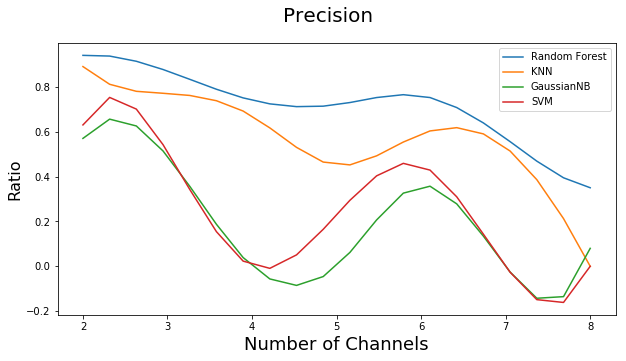

In [115]:
ysmooth1 = spline(randomf.index,randomf['precision'],xnew)
ysmooth2 = spline(knn.index,knn['precision'],xnew)
ysmooth3 = spline(naive.index,naive['precision'],xnew)
ysmooth4 = spline(svm.index,svm['precision'],xnew)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Precision', fontsize=20)
plt.xlabel('Number of Channels', fontsize=18)
plt.ylabel('Ratio', fontsize=16)
plt.plot(xnew,ysmooth1, label='Random Forest')
plt.plot(xnew,ysmooth2, label='KNN')
plt.plot(xnew,ysmooth3, label='GaussianNB')
plt.plot(xnew,ysmooth4, label='SVM')
plt.legend(loc='upper right')
plt.show()

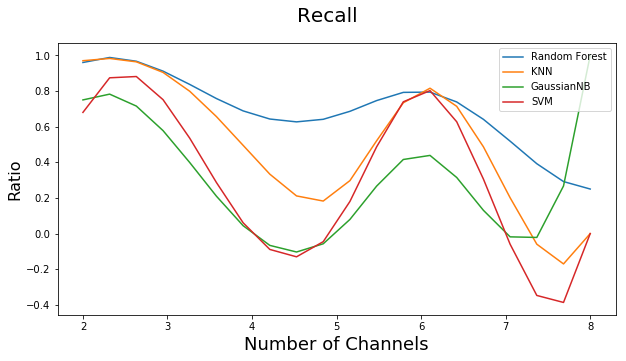

In [116]:
ysmooth1 = spline(randomf.index,randomf['recall'],xnew)
ysmooth2 = spline(knn.index,knn['recall'],xnew)
ysmooth3 = spline(naive.index,naive['recall'],xnew)
ysmooth4 = spline(svm.index,svm['recall'],xnew)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Recall', fontsize=20)
plt.xlabel('Number of Channels', fontsize=18)
plt.ylabel('Ratio', fontsize=16)
plt.plot(xnew,ysmooth1, label='Random Forest')
plt.plot(xnew,ysmooth2, label='KNN')
plt.plot(xnew,ysmooth3, label='GaussianNB')
plt.plot(xnew,ysmooth4, label='SVM')
plt.legend(loc='upper right')
plt.show()

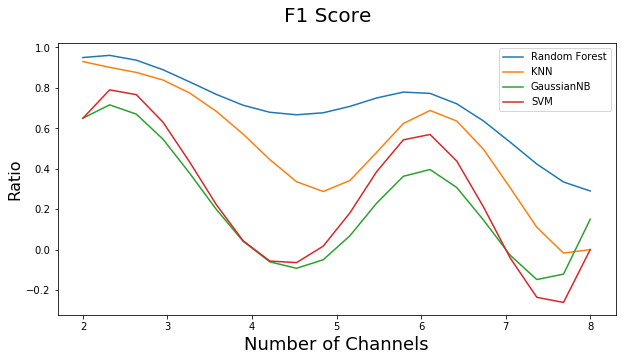

In [117]:
ysmooth1 = spline(randomf.index,randomf['f1-score'],xnew)
ysmooth2 = spline(knn.index,knn['f1-score'],xnew)
ysmooth3 = spline(naive.index,naive['f1-score'],xnew)
ysmooth4 = spline(svm.index,svm['f1-score'],xnew)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('F1 Score', fontsize=20)
plt.xlabel('Number of Channels', fontsize=18)
plt.ylabel('Ratio', fontsize=16)
plt.plot(xnew,ysmooth1, label='Random Forest')
plt.plot(xnew,ysmooth2, label='KNN')
plt.plot(xnew,ysmooth3, label='GaussianNB')
plt.plot(xnew,ysmooth4, label='SVM')
plt.legend(loc='upper right')
plt.show()